In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding a categorical feature to the dataset
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

X = iris_df.drop('target', axis=1)

# 1. Partitioning Approach

# K-Mode

In [5]:
import numpy as np

def hamming_distance(x1, x2):
    return np.sum(x1 != x2)

def compute_mode(attribute_values):
    unique_values, counts = np.unique(attribute_values, return_counts=True)
    return unique_values[np.argmax(counts)]

def k_modes_clustering(data, k, modes=None, max_iters=100):
    n, m = data.shape
    
    # Initialize cluster modes
    if modes is None:
        modes = data[np.random.choice(n, k, replace=False)]
    
    cluster_modes = np.array(modes)
    
    # Initialize cluster assignments
    clusters = np.zeros(n, dtype=int)
    
    prev_clusters = None
    
    for iteration in range(max_iters):
        # Assign each data point to the nearest cluster
        for i, obj in enumerate(data):
            distances = [hamming_distance(obj, mode) for mode in cluster_modes]
            clusters[i] = np.argmin(distances)
        
        # Update cluster modes
        for j in range(k):
            cluster_points = data[clusters == j]
            mode_values = [compute_mode(cluster_points[:, c]) for c in range(m)]
            cluster_modes[j] = mode_values
        
        # Print cluster assignments and cluster modes for each iteration
        print(f"Iteration {iteration + 1}:")
        print("Cluster assignments:", clusters)
        print("Modes for each cluster:", cluster_modes)
        print()
        
        # Check for convergence
        if np.array_equal(clusters, prev_clusters):
            print("Convergence reached. Breaking off...")
            break
        
        # Update previous cluster assignments
        prev_clusters = np.copy(clusters)
    
    return clusters, cluster_modes



In [10]:
# Example usage
data = np.array([['A', 'B', 'A', 'B', 'C'],
                 ['A', 'A', 'A', 'B', 'B'],
                 ['C', 'A', 'B', 'B', 'A'],
                 ['A', 'B', 'B', 'A', 'C'],
                 ['C', 'C', 'C', 'B', 'A'],
                 ['A', 'A', 'A', 'A', 'B'],
                 ['A', 'C', 'A', 'C', 'C'],
                 ['C', 'A', 'B', 'B', 'C'],
                 ['A', 'A', 'B', 'C', 'A'],
                 ['A', 'B', 'B', 'A', 'C']]) 

k = 3
clusters, cluster_modes = k_modes_clustering(data, k)

print("Final cluster assignments:", clusters)
print("Final modes for each cluster:", cluster_modes)

Iteration 1:
Cluster assignments: [0 0 1 0 2 0 0 0 1 0]
Modes for each cluster: [['A' 'A' 'A' 'A' 'C']
 ['A' 'A' 'B' 'B' 'A']
 ['C' 'C' 'C' 'B' 'A']]

Iteration 2:
Cluster assignments: [0 0 1 0 2 0 0 1 1 0]
Modes for each cluster: [['A' 'B' 'A' 'A' 'C']
 ['C' 'A' 'B' 'B' 'A']
 ['C' 'C' 'C' 'B' 'A']]

Iteration 3:
Cluster assignments: [0 0 1 0 2 0 0 1 1 0]
Modes for each cluster: [['A' 'B' 'A' 'A' 'C']
 ['C' 'A' 'B' 'B' 'A']
 ['C' 'C' 'C' 'B' 'A']]

Convergence reached. Breaking off...
Final cluster assignments: [0 0 1 0 2 0 0 1 1 0]
Final modes for each cluster: [['A' 'B' 'A' 'A' 'C']
 ['C' 'A' 'B' 'B' 'A']
 ['C' 'C' 'C' 'B' 'A']]


In [11]:
modes = [['A', 'B', 'A', 'B', 'C'],
         ['C', 'C', 'C', 'B', 'A'],
         ['A', 'B', 'B', 'A', 'C']]

clusters, cluster_modes = k_modes_clustering(data,3, modes)

print("Final cluster assignments:", clusters)
print("Final modes for each cluster:", cluster_modes)

Iteration 1:
Cluster assignments: [0 0 1 2 1 0 0 0 2 2]
Modes for each cluster: [['A' 'A' 'A' 'B' 'C']
 ['C' 'A' 'B' 'B' 'A']
 ['A' 'B' 'B' 'A' 'C']]

Iteration 2:
Cluster assignments: [0 0 1 2 1 0 0 1 1 2]
Modes for each cluster: [['A' 'A' 'A' 'B' 'B']
 ['C' 'A' 'B' 'B' 'A']
 ['A' 'B' 'B' 'A' 'C']]

Iteration 3:
Cluster assignments: [0 0 1 2 1 0 0 1 1 2]
Modes for each cluster: [['A' 'A' 'A' 'B' 'B']
 ['C' 'A' 'B' 'B' 'A']
 ['A' 'B' 'B' 'A' 'C']]

Convergence reached. Breaking off...
Final cluster assignments: [0 0 1 2 1 0 0 1 1 2]
Final modes for each cluster: [['A' 'A' 'A' 'B' 'B']
 ['C' 'A' 'B' 'B' 'A']
 ['A' 'B' 'B' 'A' 'C']]


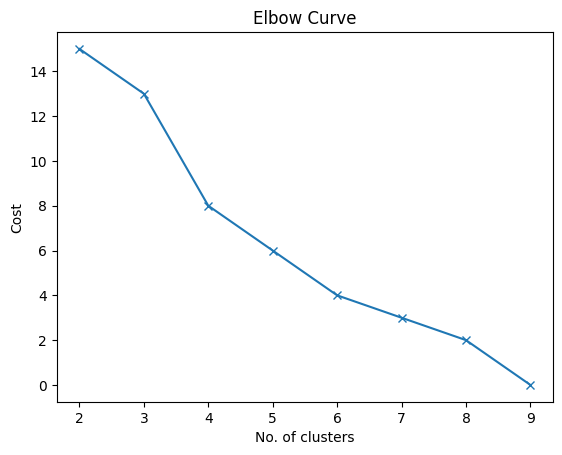

In [12]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Elbow curve to find optimal K
cost = []
K = range(2, 10)  
for k in K:
    kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=0)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
# Plot the elbow curve
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Optimal number of clusters (K): 4
Cluster assignments: [0 1 2 0 2 1 3 2 2 0]


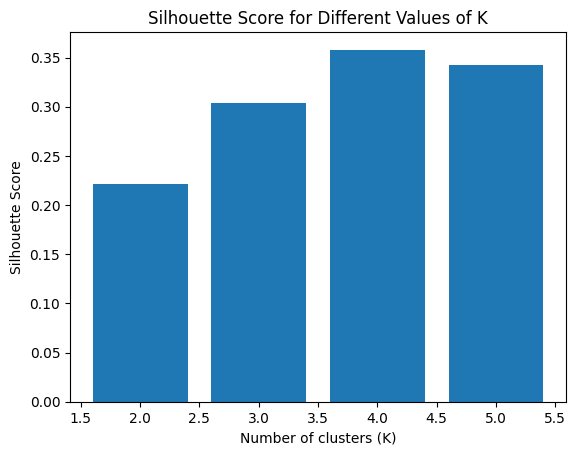

In [13]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Generate the dataset
data = np.array([['A', 'B', 'A', 'B', 'C'],
                 ['A', 'A', 'A', 'B', 'B'],
                 ['C', 'A', 'B', 'B', 'A'],
                 ['A', 'B', 'B', 'A', 'C'],
                 ['C', 'C', 'C', 'B', 'A'],
                 ['A', 'A', 'A', 'A', 'B'],
                 ['A', 'C', 'A', 'C', 'C'],
                 ['C', 'A', 'B', 'B', 'C'],
                 ['A', 'A', 'B', 'C', 'A'],
                 ['A', 'B', 'B', 'A', 'C']]) 

# One-hot encode the categorical data
encoder = OneHotEncoder(sparse=False)
data_encoded = encoder.fit_transform(data)

# Initialize lists to store silhouette scores and optimal K values
silhouette_scores = []
K_values = []

# Range of K values to try
K = range(2, 6)  # Trying K values from 2 to 5

# Calculate silhouette scores for each value of K
for k in K:
    kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=0)
    clusters = kmode.fit_predict(data_encoded)
    silhouette_scores.append(silhouette_score(data_encoded, clusters))
    K_values.append(k)

# Find the optimal K value based on the highest silhouette score
optimal_k = K_values[np.argmax(silhouette_scores)]

# Initialize KModes with optimal K value and fit the data
kmode = KModes(n_clusters=optimal_k, init="random", n_init=5, verbose=0)
clusters = kmode.fit_predict(data_encoded)

# Print the optimal K value and the cluster assignments
print("Optimal number of clusters (K):", optimal_k)
print("Cluster assignments:", clusters)

# Plot the silhouette scores in a histogram
plt.bar(K_values, silhouette_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of K')
plt.show()


# K-Means++

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding a categorical feature to the dataset
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Define the feature matrix
X = iris_df.drop('target', axis=1)

class KMeansNorm:
    def __init__(self, k, norm='euclidean', max_iters=100):
        self.k = k
        self.norm = norm
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids using K-Means++
        self.centroids = self._kmeans_plusplus_init(X)
        initial_centroids = self._kmeans_plusplus_init(X)
        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

            print(f"Centroids after {_ + 1} iterations: \n{new_centroids}")
        
        
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids,initial_centroids)

        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    
    def _kmeans_plusplus_init(self, X):
        centroids = []
        centroids.append(X.sample().values[0])

        for _ in range(1, self.k):
            distances = np.array([min([self._compute_distance(point, centroid) for centroid in centroids]) for point in X.values])
            i = np.argmax(distances)
            centroids.append(X.iloc[i].values)

        return np.array(centroids)

    def _assign_clusters(self, X):
        clusters = []
        for point in X.values:
            cluster_distances = [self._compute_distance(point, centroid) for centroid in self.centroids]
            clusters.append(np.argmin(cluster_distances))
        return np.array(clusters)

    def _update_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            centroid = np.mean(cluster_points.values, axis=0)
            new_centroids.append(centroid)
        return np.array(new_centroids)

    def _compute_distance(self, x, y):
        if self.norm == 'euclidean':
            return np.linalg.norm(x - y)
        elif self.norm == 'manhattan':
            return np.sum(np.abs(x - y))
        elif self.norm == 'maximum':
            return np.max(np.abs(x - y))

    def _plot_clusters(self, X, labels, cluster_centers, initial_centroids):
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i}')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Final Centroids')
        plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], color='red', marker='o', label='Initial Centroids')
        plt.title('K-Means Clustering')
        plt.legend()
        plt.show()


    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)





In [ ]:
def _kmeans_plusplus_init(self, X):
        centroids = []
        centroids.append(X.sample().values[0])

        for _ in range(1, self.k):
            distances = np.array([min([self._compute_distance(point, centroid) for centroid in centroids]) for point in X.values])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X.iloc[i].values)

        return np.array(centroids)

# A) Euclidean Distance

Centroids after 1 iterations: 
[[6.01428571 2.8038961  4.57532468 1.53896104]
 [7.09130435 3.1        6.01304348 2.13478261]
 [5.006      3.428      1.462      0.246     ]]
Centroids after 2 iterations: 
[[5.95588235 2.76470588 4.46323529 1.46176471]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.006      3.428      1.462      0.246     ]]
Centroids after 3 iterations: 
[[5.93230769 2.75538462 4.42923077 1.43846154]
 [6.87428571 3.08857143 5.79142857 2.11714286]
 [5.006      3.428      1.462      0.246     ]]
Centroids after 4 iterations: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]]


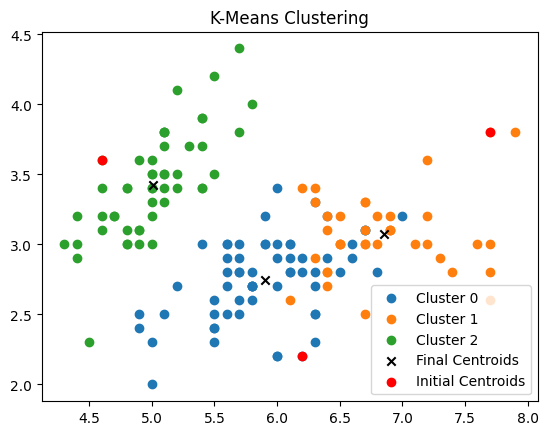

Silhouette Score: 0.5528190123564095
Labels (Euclidean):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


In [25]:
# Perform K-means clustering with different norms
kmeansEuclidean = KMeansNorm(k=3, norm='euclidean')
labelsEuclidean = kmeansEuclidean.fit(X)
print("Labels (Euclidean):")
print(labelsEuclidean)

# B) Manhattan Distance

Centroids after 1 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.99285714 3.1        5.89642857 2.16071429]
 [5.97777778 2.78333333 4.52083333 1.4875    ]]
Centroids after 2 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.88823529 3.1        5.80588235 2.12352941]
 [5.93939394 2.75454545 4.44242424 1.44545455]]
Centroids after 3 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.87027027 3.08648649 5.74594595 2.08918919]
 [5.9047619  2.74603175 4.41269841 1.43333333]]


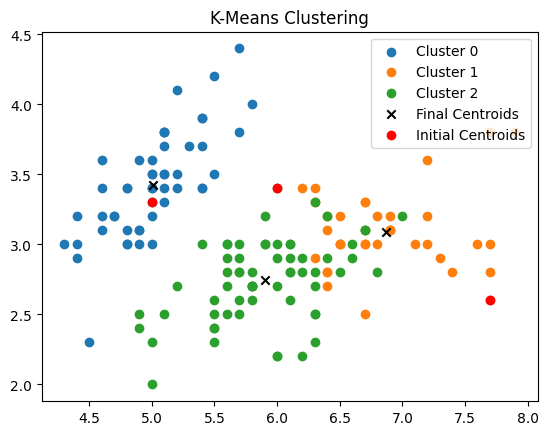

Silhouette Score: 0.5533422301756081
Labels (Manhattan):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [20]:
kmeansManhattan = KMeansNorm(k=3, norm='manhattan')
labelsManhattan = kmeansManhattan.fit(X)
print("Labels (Manhattan):")
print(labelsManhattan)

# C) Maximum Norm

Centroids after 1 iterations: 
[[7.37857143 3.14285714 6.21428571 2.1       ]
 [6.33833333 2.91       4.99       1.74166667]
 [5.16973684 3.15789474 2.33289474 0.60526316]]
Centroids after 2 iterations: 
[[7.26470588 3.11764706 6.14117647 2.09411765]
 [6.12207792 2.85064935 4.75324675 1.63116883]
 [5.02857143 3.32321429 1.66607143 0.33392857]]
Centroids after 3 iterations: 
[[7.12272727 3.11363636 6.03181818 2.13181818]
 [6.03116883 2.80779221 4.60909091 1.55324675]
 [5.00784314 3.40980392 1.49215686 0.2627451 ]]
Centroids after 4 iterations: 
[[6.94482759 3.09310345 5.91034483 2.1137931 ]
 [5.99571429 2.78571429 4.51714286 1.50285714]
 [5.00784314 3.40980392 1.49215686 0.2627451 ]]
Centroids after 5 iterations: 
[[6.87352941 3.07352941 5.82352941 2.10294118]
 [5.96       2.77230769 4.45538462 1.46153846]
 [5.00784314 3.40980392 1.49215686 0.2627451 ]]
Centroids after 6 iterations: 
[[6.86388889 3.07222222 5.78055556 2.08333333]
 [5.9234375  2.759375   4.4140625  1.446875  ]
 [5.006   

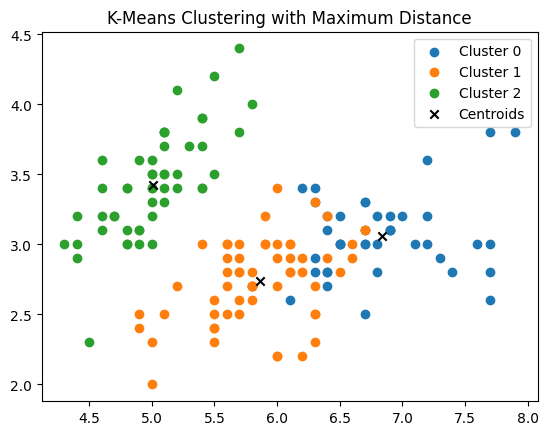

Silhouette Score: 0.5444674178257488
Labels (Maximum):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


In [29]:
kmeansMaximum = KMeansNorm(k=3, norm='maximum')
labelsMaximum = kmeansMaximum.fit(X)
print("Labels (Maximum):")
print(labelsMaximum)

# D) Mahalanobis Distance

In [30]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import mahalanobis

In [31]:
class KMeansMahalanobis:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids using K-Means++
        self.centroids = self._kmeans_plusplus_init(X)

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
            
            print(f"Centroids after {_+1} iterations: \n{new_centroids}")
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _kmeans_plusplus_init(self, X):
        centroids = []
        centroids.append(X.sample().values[0])

        for _ in range(1, self.k):
            distances = np.array([min([np.linalg.norm(point-centroid)**2 for centroid in centroids]) for point in X.values])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X.iloc[i].values)

        return np.array(centroids)

    def _assign_clusters(self, X):
        cov_matrix = np.cov(X.values.T)
        clusters = []
        for point in X.values:
            cluster_distances = [mahalanobis(point, centroid, np.linalg.inv(cov_matrix)) for centroid in self.centroids]
            clusters.append(np.argmin(cluster_distances))
        return np.array(clusters)

    def _update_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            centroid = np.mean(cluster_points.values, axis=0)
            new_centroids.append(centroid)
        return np.array(new_centroids)

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i}')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Centroids')
        plt.title('K-Means Clustering with Mahalanobis Distance')
        plt.legend()
        plt.show()
        
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)

Centroids after 1 iterations: 
[[6.31621622 3.05945946 5.24864865 2.05135135]
 [5.05135135 3.43243243 1.45675676 0.29189189]
 [5.99868421 2.87368421 4.15263158 1.22631579]]
Centroids after 2 iterations: 
[[6.245      3.0125     5.1375     2.005     ]
 [5.012      3.41       1.484      0.264     ]
 [6.26833333 2.79333333 4.73333333 1.44166667]]
Centroids after 3 iterations: 
[[6.18       3.         5.06       1.975     ]
 [5.006      3.428      1.462      0.246     ]
 [6.31666667 2.78666667 4.80333333 1.47666667]]


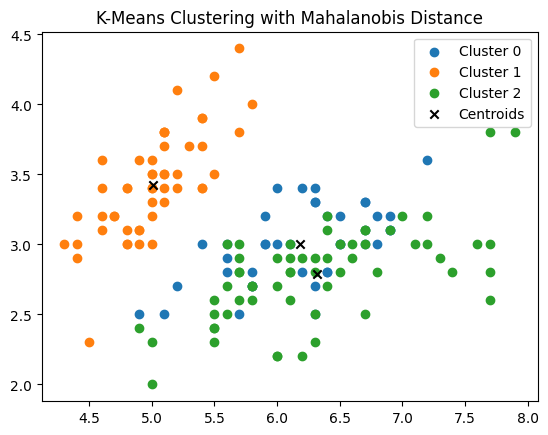

Silhouette Score: 0.3338479477424778
Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 2 2 0 2 0 2 2 0 2 0 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 2 0 2 2 0 0
 2 0 0 0 0 2 2 2 2 0 0 2 0 0 2 0 0 0 2 2 2 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0
 0 0]


In [32]:
kmeansMaha = KMeansMahalanobis(k=3)
labels = kmeansMaha.fit(X)
print("Labels:")
print(labels)

# E) Inner Product Space

In [33]:
class KMeansInnerProduct:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids using K-Means++
        self.centroids = self._kmeans_plusplus_init(X)

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
            
            print(f"Centroids after {_+1} iterations: \n{new_centroids}")
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _kmeans_plusplus_init(self, X):
        centroids = []
        centroids.append(X.sample().values[0])

        for _ in range(1, self.k):
            distances = np.array([min([np.inner(point-centroid, point-centroid) for centroid in centroids]) for point in X.values])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X.iloc[i].values)

        return np.array(centroids)

    def _assign_clusters(self, X):
        clusters = []
        for point in X.values:
            cluster_distances = [np.inner(point-centroid, point-centroid) for centroid in self.centroids]
            clusters.append(np.argmin(cluster_distances))
        return np.array(clusters)

    def _update_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            centroid = np.mean(cluster_points.values, axis=0)
            new_centroids.append(centroid)
        return np.array(new_centroids)

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i}')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Centroids')
        plt.title('K-Means Clustering with Inner Product Space Distance')
        plt.legend()
        plt.show()
        
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)


Centroids after 1 iterations: 
[[5.804 2.73  4.266 1.37 ]
 [5.006 3.428 1.462 0.246]
 [6.72  3.014 5.546 1.982]]
Centroids after 2 iterations: 
[[5.82962963 2.73148148 4.31481481 1.39259259]
 [5.006      3.428      1.462      0.246     ]
 [6.76956522 3.03695652 5.6        2.00869565]]
Centroids after 3 iterations: 
[[5.85438596 2.74210526 4.34561404 1.40877193]
 [5.006      3.428      1.462      0.246     ]
 [6.80232558 3.04418605 5.64883721 2.03023256]]
Centroids after 4 iterations: 
[[5.885      2.74       4.37666667 1.41833333]
 [5.006      3.428      1.462      0.246     ]
 [6.8275     3.07       5.7        2.0625    ]]
Centroids after 5 iterations: 
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


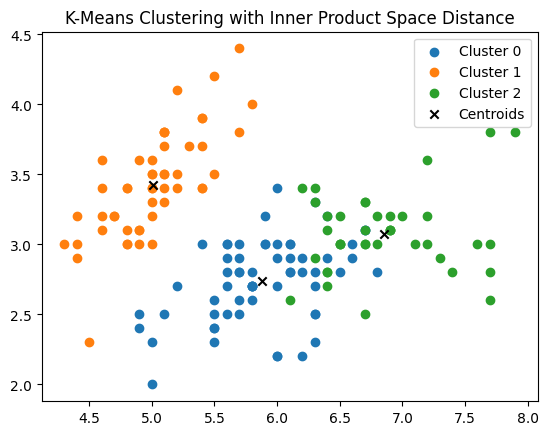

Silhouette Score: 0.551191604619592
Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [35]:
kmeansIP = KMeansInnerProduct(k = 3)
labels = kmeansIP.fit(X)
print("Labels:")
print(labels)

# F) Hamming Distance

In [36]:
class KMeansHamming:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids using K-Means++
        self.centroids = self._kmeans_plusplus_init(X)

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
            
            print(f"Centroids after {_+1} Iteration: \n{new_centroids}")
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _kmeans_plusplus_init(self, X):
        centroids = []
        centroids.append(X.sample().values[0])

        for _ in range(1, self.k):
            distances = np.array([min([self._hamming_distance(point, centroid) for centroid in centroids]) for point in X.values])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X.iloc[i].values)

        return np.array(centroids)

    def _assign_clusters(self, X):
        clusters = []
        for point in X.values:
            cluster_distances = [self._hamming_distance(point, centroid) for centroid in self.centroids]
            clusters.append(np.argmin(cluster_distances))
        return np.array(clusters)

    def _update_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            centroid = cluster_points.mode().iloc[0]  # Mode for Hamming distance
            new_centroids.append(centroid)
        return np.array(new_centroids)

    def _hamming_distance(self, x, y):
        return np.sum(x != y)

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i}')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Centroids')
        plt.title('K-Means Clustering with Hamming Distance')
        plt.legend()
        plt.show()
        
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)

Centroids after 1 Iteration: 
[[5.  3.  1.4 0.2]
 [7.7 2.8 5.1 2. ]
 [6.3 2.5 5.  1.9]]
Centroids after 2 Iteration: 
[[5.  3.  1.4 0.2]
 [5.8 2.8 5.1 2. ]
 [6.3 2.5 5.  1.8]]


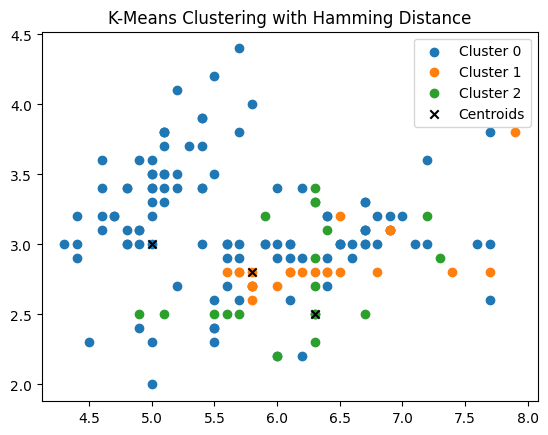

Silhouette Score: -0.05026347856669261
Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 1 0 2 2 1 2 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 2 0 2 0 0 1 0 0 0 0 0 2 1 2 1 0 2 0 0 2 2 2 0 1
 0 0 2 1 0 0 0 0 2 0 1 1 2 0 2 1 0 1 0 1 1 1 1 0 0 2 2 0 0 0 1 1 0 0 0 2 0
 0 0]


In [37]:
kmeansHD = KMeansHamming(k = 3)
labels = kmeansHD.fit(X)
print("Labels:")
print(labels)

# Elbow-Method

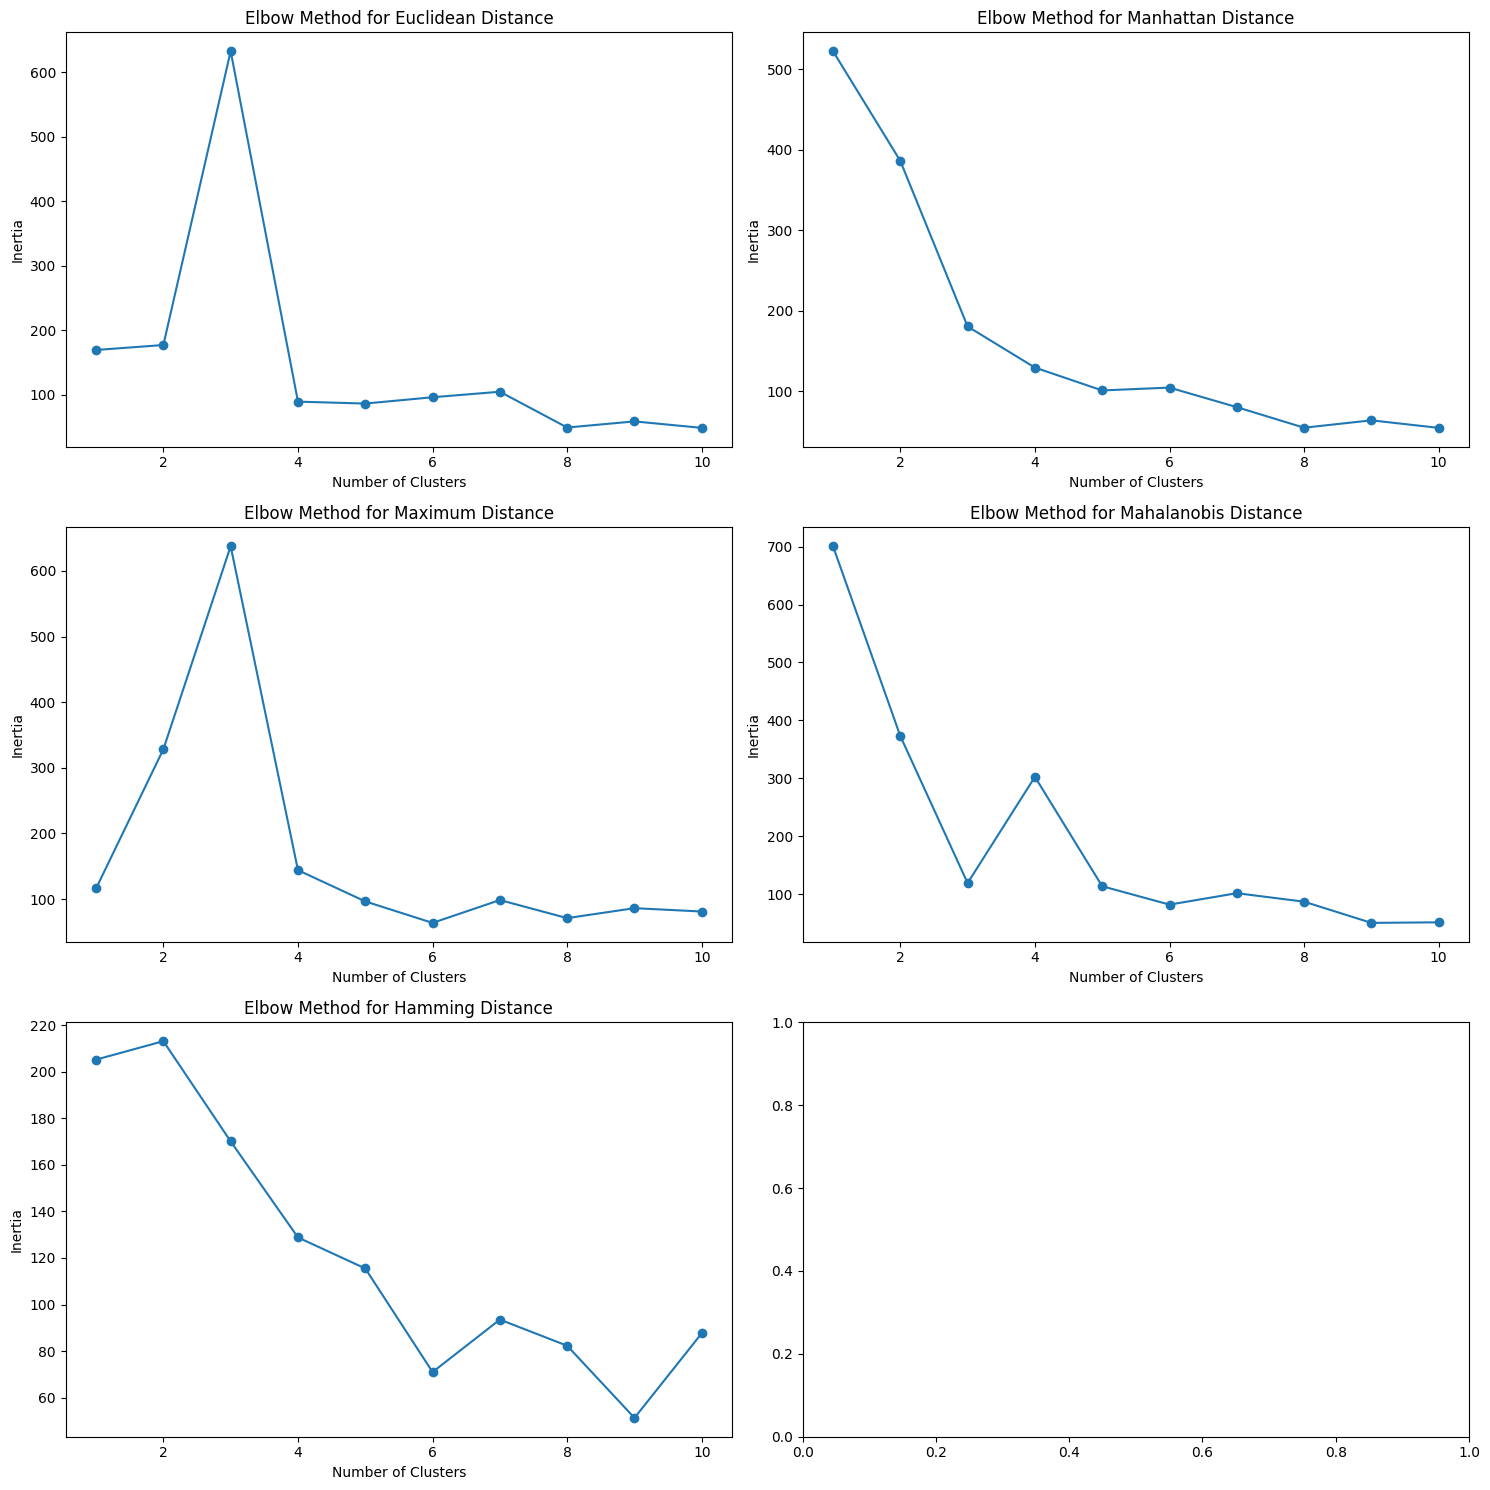

In [40]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def distance_matrix(X, centroids, metric):
    if metric == 'euclidean':
        return cdist(X, centroids, metric='euclidean')
    elif metric == 'manhattan':
        return cdist(X, centroids, metric='cityblock')
    elif metric == 'maximum':
        return cdist(X, centroids, metric='chebyshev')
    elif metric == 'mahalanobis':
        return cdist(X, centroids, metric='mahalanobis', VI=np.linalg.inv(np.cov(X.T)))
    elif metric == 'inner_product':
        return X @ centroids.T
    elif metric == 'hamming':
        return cdist(X, centroids, metric='hamming')

def kmeans_plusplus(X, k, metric):
    X_reset_index = X.reset_index(drop=True)  # Reset index
    centroids = [X_reset_index.iloc[np.random.choice(X_reset_index.shape[0])]]
    for _ in range(1, k):
        distances = distance_matrix(X_reset_index, np.array(centroids), metric)
        min_distances = np.min(distances, axis=1)
        cumulative_prob = np.cumsum(min_distances / np.sum(min_distances))
        r = np.random.rand()
        for j, p in enumerate(cumulative_prob):
            if r < p:
                centroids.append(X_reset_index.iloc[j])
                break
    return np.array(centroids)


def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

def plot_clusters(X, centroids, labels, ax, title):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', ax=ax)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', label='Centroids', s=100)
    ax.set_title(title)
    ax.legend()

def evaluate_clusters(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

def compute_inertia(X, centroids, labels):
    distances = distance_matrix(X, centroids, 'euclidean')
    sq_distances = np.min(distances, axis=1) ** 2
    return np.sum(sq_distances)

# Assuming X is defined elsewhere in your code

k = 3
metrics = ['euclidean', 'manhattan', 'maximum', 'mahalanobis', 'hamming']
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, metric in enumerate(metrics):
    inertias = []
    centroids_kmeans = kmeans_plusplus(X, k, metric)
    labels_kmeans = np.argmin(distance_matrix(X, centroids_kmeans, metric), axis=1)
    inertias.append(compute_inertia(X, centroids_kmeans, labels_kmeans))
    
    for k_value in range(2, 11):
        centroids_kmeans = kmeans_plusplus(X, k_value, metric)
        labels_kmeans = np.argmin(distance_matrix(X, centroids_kmeans, metric), axis=1)
        inertias.append(compute_inertia(X, centroids_kmeans, labels_kmeans))

    row = i // 2
    col = i % 2
    axs[row, col].plot(range(1, 11), inertias, marker='o')
    axs[row, col].set_title(f'Elbow Method for {metric.capitalize()} Distance')
    axs[row, col].set_xlabel('Number of Clusters')
    axs[row, col].set_ylabel('Inertia')

plt.tight_layout()
plt.show()


# 2. Hierarchical approach

# A) Diana

# Euclidean Distance

In [41]:
iris = load_iris()
data = iris.data

In [42]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def dianaED(data, n_clusters):
    # Calculate the dissimilarity matrix
    dissimilarity = squareform(pdist(data, metric='euclidean'))

    clusters = [list(range(len(data)))]
    centroids = [np.mean(data[clusters[0]], axis=0)]  # Initialize the centroid of the first cluster

    while len(clusters) < n_clusters:
        # Find the cluster with the maximum diameter
        max_diameter_cluster_index = np.argmax([np.max(dissimilarity[cluster][:, cluster]) for cluster in clusters])
        max_diameter_cluster = clusters[max_diameter_cluster_index]

        # Find the most dissimilar element in the cluster
        most_dissimilar_element_index = np.argmax(np.mean(dissimilarity[max_diameter_cluster][:, max_diameter_cluster], axis=1))
        most_dissimilar_element = max_diameter_cluster[most_dissimilar_element_index]

        # Split the cluster
        new_cluster = [most_dissimilar_element]
        remaining_cluster = [element for element in max_diameter_cluster if element != most_dissimilar_element]

        # Move elements to the new cluster if they are more similar to it
        for element in remaining_cluster:
            if np.mean(dissimilarity[element][new_cluster]) < np.mean(dissimilarity[element][remaining_cluster]):
                remaining_cluster.remove(element)
                new_cluster.append(element)

        # Update the clusters
        clusters[max_diameter_cluster_index] = remaining_cluster
        clusters.append(new_cluster)

        new_centroids = [np.mean(data[cluster], axis=0) for cluster in clusters]
        print(f"Centroids: {new_centroids}")
        centroids = new_centroids
        
    # Calculate silhouette score
    labels = np.zeros(len(data))
    for i, cluster in enumerate(clusters):
        labels[cluster] = i
    silhouette = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette}")
    
    return clusters

def plot_dendrogram(data, clusters):
    # Concatenate data points from clusters
    clustered_data = np.concatenate([data[cluster] for cluster in clusters])

    # Compute linkage matrix
    linkage_matrix = linkage(clustered_data, 'single')

    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

def plot_clusters(data, clusters):
    # Plot clusters
    plt.figure(figsize=(10, 5))
    for i, cluster in enumerate(clusters):
        plt.scatter(data[cluster][:, 0], data[cluster][:, 1], label=f'Cluster {i+1}')
    plt.title('Cluster Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

Centroids: [array([5.6832, 3.068 , 3.3712, 1.0168]), array([6.644, 3.004, 5.692, 2.112])]
Centroids: [array([5.46896552, 3.15402299, 2.81954023, 0.79425287]), array([6.644, 3.004, 5.692, 2.112]), array([6.17368421, 2.87105263, 4.63421053, 1.52631579])]
Silhouette Score: 0.11437719643738878


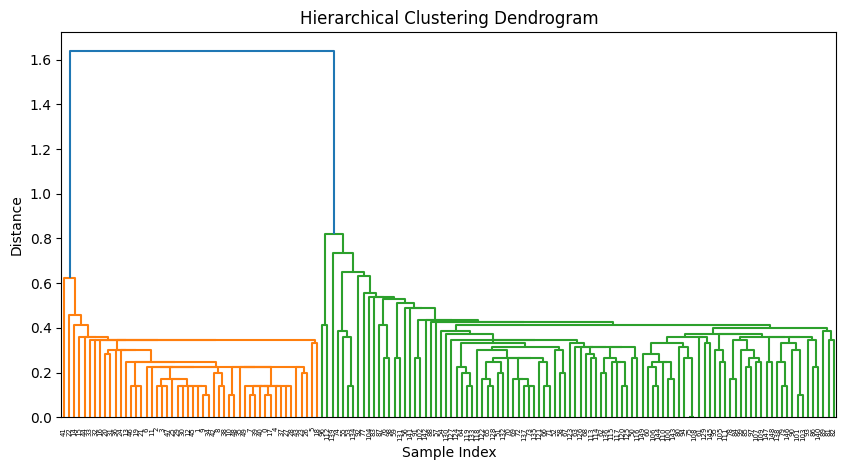

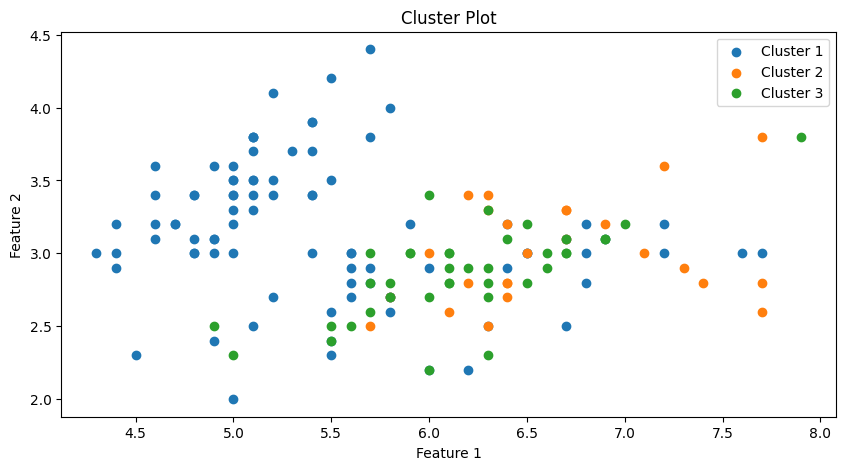

In [43]:
n_clusters = 3  # Number of clusters
clusters = dianaED(data, n_clusters)

# Plot dendrogram
plot_dendrogram(data, clusters)

# Plot clusters
plot_clusters(data, clusters)

# Manhattan Distance

In [44]:
def diana(data, n_clusters):
    # Calculate the dissimilarity matrix using Manhattan distance
    dissimilarity = squareform(pdist(data, metric='cityblock'))  # Manhattan distance

    clusters = [list(range(len(data)))]
    centroids = [np.mean(data[clusters[0]], axis=0)]  # Initialize the centroid of the first cluster

    while len(clusters) < n_clusters:
        # Find the cluster with the maximum diameter
        max_diameter_cluster_index = np.argmax([np.max(dissimilarity[cluster][:, cluster]) for cluster in clusters])
        max_diameter_cluster = clusters[max_diameter_cluster_index]

        # Find the most dissimilar element in the cluster
        most_dissimilar_element_index = np.argmax(np.mean(dissimilarity[max_diameter_cluster][:, max_diameter_cluster], axis=1))
        most_dissimilar_element = max_diameter_cluster[most_dissimilar_element_index]

        # Split the cluster
        new_cluster = [most_dissimilar_element]
        remaining_cluster = [element for element in max_diameter_cluster if element != most_dissimilar_element]

        # Move elements to the new cluster if they are more similar to it
        for element in remaining_cluster:
            if np.mean(dissimilarity[element][new_cluster]) < np.mean(dissimilarity[element][remaining_cluster]):
                remaining_cluster.remove(element)
                new_cluster.append(element)

        # Update the clusters
        clusters[max_diameter_cluster_index] = remaining_cluster
        clusters.append(new_cluster)

        # Calculate and print the new centroids if they have changed
        new_centroids = [np.mean(data[cluster], axis=0) for cluster in clusters]
        print(f"Centroid: {new_centroids}")
        centroids = new_centroids
        
    # Calculate silhouette score
    labels = np.zeros(len(data))
    for i, cluster in enumerate(clusters):
        labels[cluster] = i
    silhouette = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette}")

    return clusters

def plot_dendrogram(data, clusters):
    # Concatenate data points from clusters
    clustered_data = np.concatenate([data[cluster] for cluster in clusters])

    # Compute linkage matrix
    linkage_matrix = linkage(clustered_data, 'single')

    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

def plot_clusters(data, clusters):
    # Plot clusters
    plt.figure(figsize=(10, 5))
    for i, cluster in enumerate(clusters):
        plt.scatter(data[cluster][:, 0], data[cluster][:, 1], label=f'Cluster {i+1}')
    plt.title('Cluster Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


Centroid: [array([5.6832, 3.068 , 3.3712, 1.0168]), array([6.644, 3.004, 5.692, 2.112])]
Centroid: [array([5.46896552, 3.15402299, 2.81954023, 0.79425287]), array([6.644, 3.004, 5.692, 2.112]), array([6.17368421, 2.87105263, 4.63421053, 1.52631579])]
Silhouette Score: 0.11437719643738878


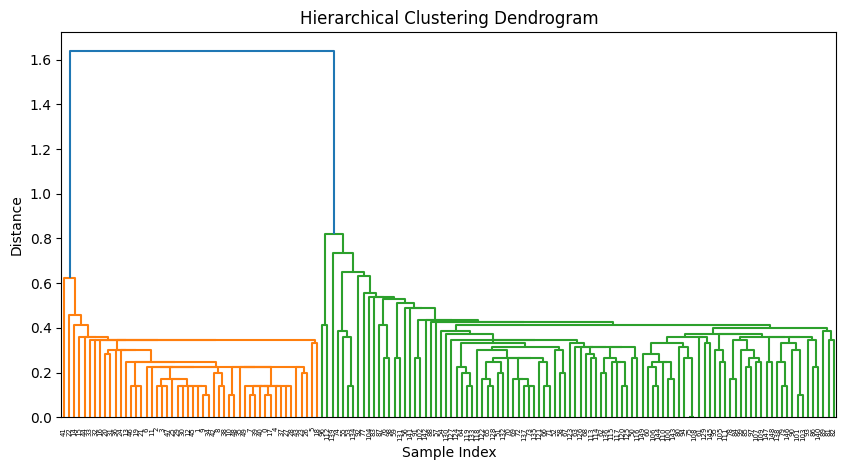

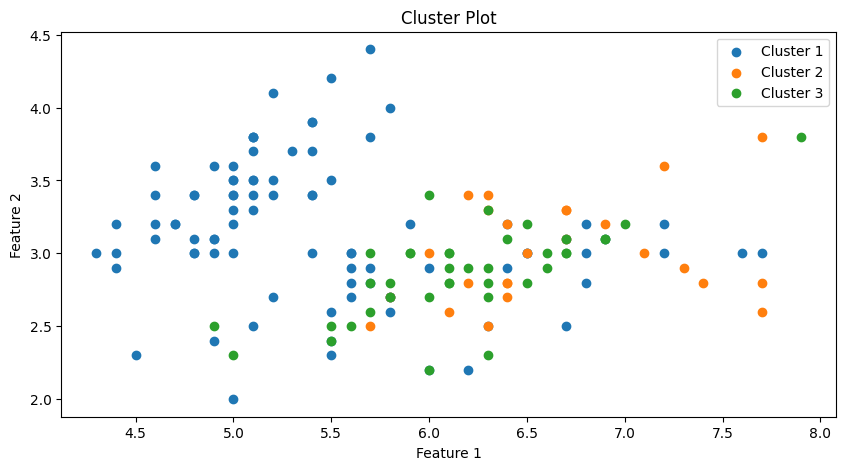

In [45]:
n_clusters = 3  # Number of clusters
clusters = diana(data, n_clusters)

# Plot dendrogram
plot_dendrogram(data, clusters)

# Plot clusters
plot_clusters(data, clusters)


# B) Agglomerative Nesting

# Euclidean distance

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The average silhouette_score is : 0.5543236611296419


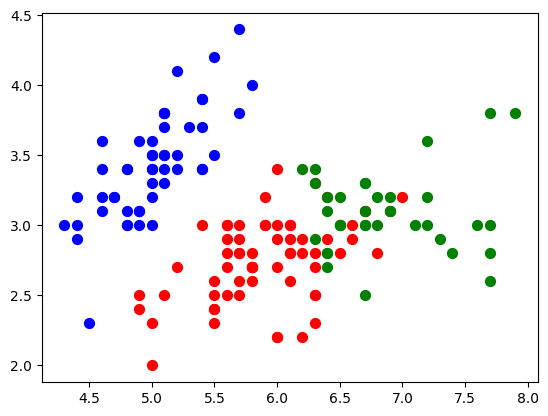

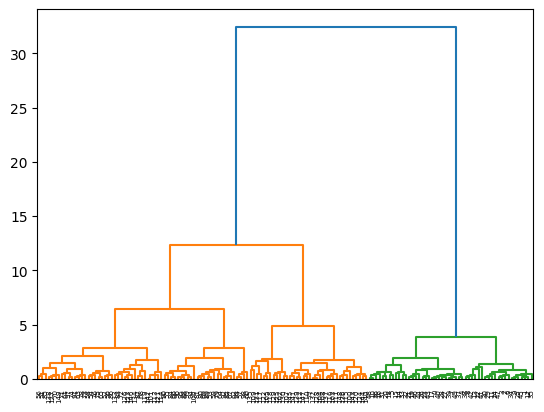

In [46]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Define the model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model and predict the clusters
model.fit(X)
labels = model.labels_

silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the clusters
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

# Create a dendrogram
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()


# Manhattan Distance

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The average silhouette_score is : 0.5535372928319979


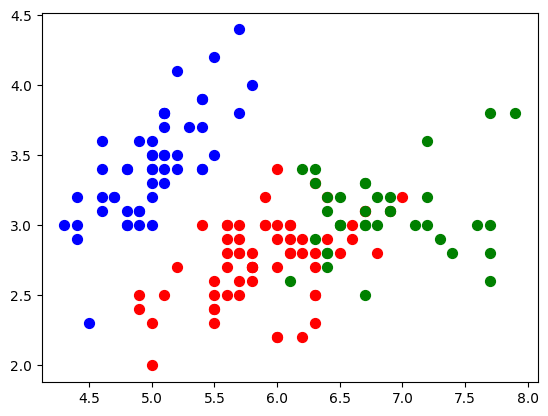

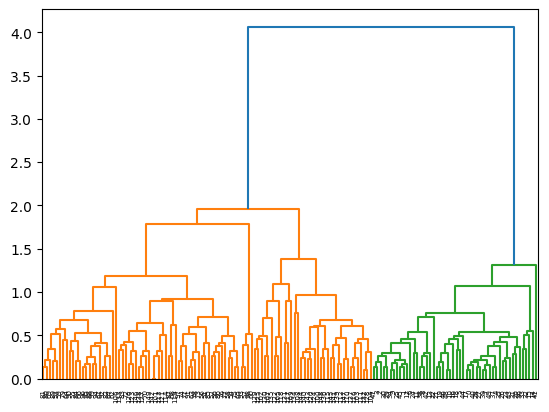

In [47]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Define the model
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')

# Fit the model and predict the clusters
model.fit(X)
labels = model.labels_

silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the clusters
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

# Create a dendrogram
linked = linkage(X, 'average')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()


# Mahalanobis Distance

/tmp/ipykernel_33/2450446544.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='average')


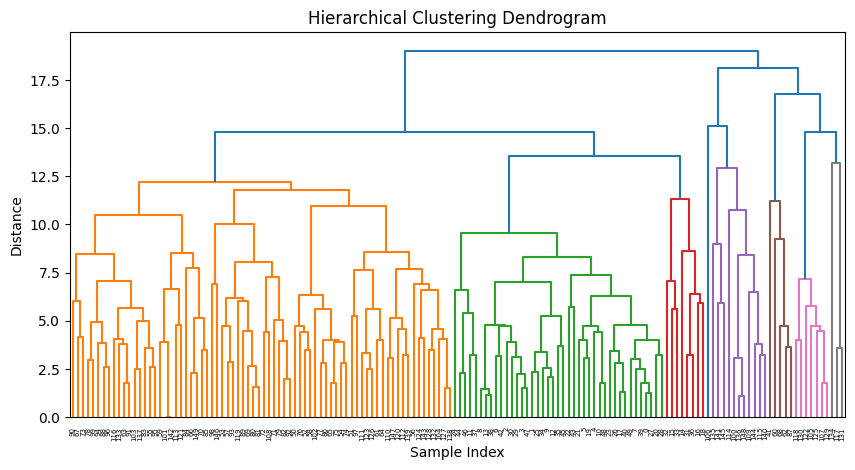

The average silhouette_score is : -0.026104658588592077


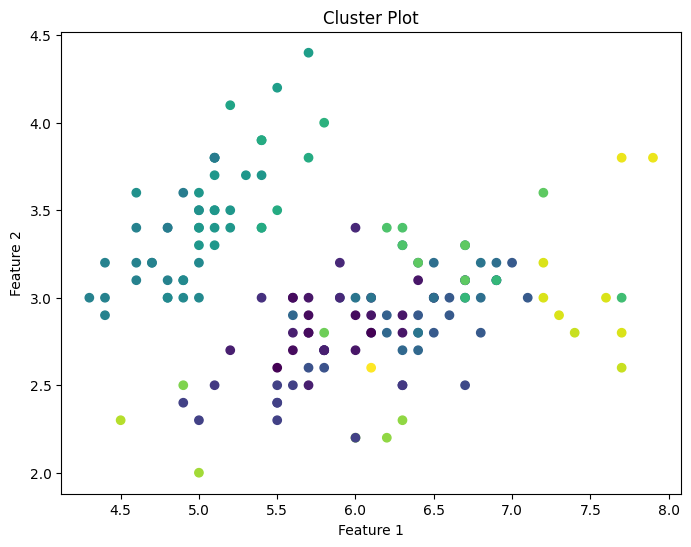

In [48]:
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# Load the iris dataset
iris = load_iris()
X = iris.data

# Compute the inverse of the covariance matrix
V = np.cov(X, rowvar=False)
VI = np.linalg.inv(V)

# Compute the Mahalanobis distance
dist_matrix = squareform(pdist(X, metric='mahalanobis', VI=VI))

# Perform hierarchical clustering
Z = linkage(dist_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Determine the number of clusters based on the dendrogram
threshold = 7  # Adjust the threshold as needed
labels = fcluster(Z, threshold, criterion='distance')

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Density-based Approach

# DBSACN

In [49]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import silhouette_score

np.random.seed(42)

# Function for creating data points in the form of a circle
def PointsInCircum(r, n=100):
    return [(math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30),
             math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 30)) for x in range(1, n + 1)]

# Generate data points for different circle sizes
points_500 = PointsInCircum(500, 1000)
points_300 = PointsInCircum(300, 700)
points_100 = PointsInCircum(100, 300)

# Create DataFrames for each set of points
df_500 = pd.DataFrame(points_500, columns=['X', 'Y'])
df_300 = pd.DataFrame(points_300, columns=['X', 'Y'])
df_100 = pd.DataFrame(points_100, columns=['X', 'Y'])

# Concatenate the DataFrames
df = pd.concat([df_500, df_300, df_100])

# Adding noise
noise = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)], columns=['X', 'Y'])
df = pd.concat([df, noise])

print(df.head())


            X          Y
0  484.891555 -31.006357
1  489.391178  21.973916
2  462.886575 -27.599889
3  517.218479   5.588090
4  455.669049   1.982181


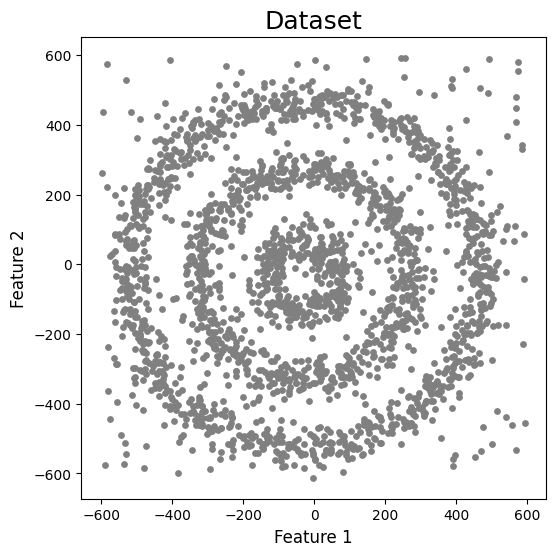

In [50]:
plt.figure(figsize = (6,6))
plt.scatter(df['X'],df['Y'],s = 15,color = 'grey')
plt.title('Dataset',fontsize = 18)
plt.xlabel('Feature 1',fontsize = 12)
plt.ylabel('Feature 2',fontsize = 12)
plt.show()

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(df[['X','Y']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

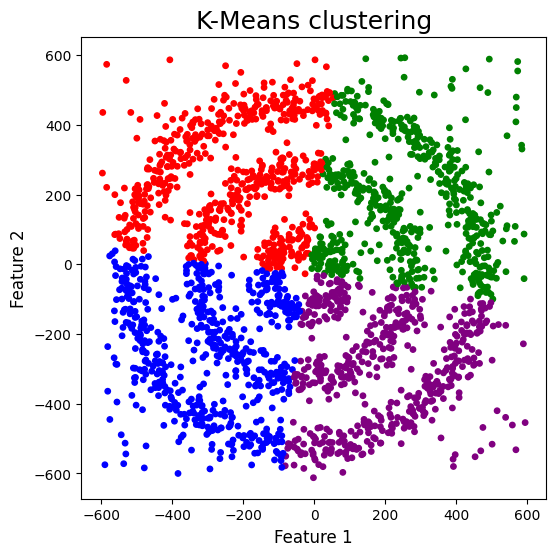

In [52]:
import matplotlib.pyplot as plt
import matplotlib
df['KMeans_labels']= kmeans.labels_
colors = ['purple','red','blue','green']
plt.figure(figsize = (6,6))
plt.scatter(df['X'],df['Y'],c = df['KMeans_labels'],cmap = matplotlib.colors.ListedColormap(colors),s = 15)
plt.title('K-Means clustering',fontsize = 18)
plt.xlabel('Feature 1',fontsize = 12)
plt.ylabel('Feature 2',fontsize = 12)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


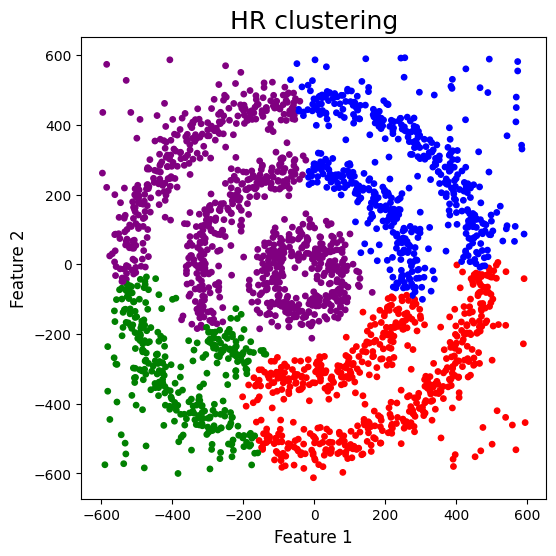

In [53]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 4,affinity='euclidean')
model.fit(df[['X','Y']])
df['HR_labels']= model.labels_
plt.figure(figsize = (6,6))
plt.scatter(df['X'],df['Y'],c = df['HR_labels'],cmap = matplotlib.colors.ListedColormap(colors),s = 15)
plt.title('HR clustering',fontsize = 18)
plt.xlabel('Feature 1',fontsize = 12)
plt.ylabel('Feature 2',fontsize = 12)
plt.show()

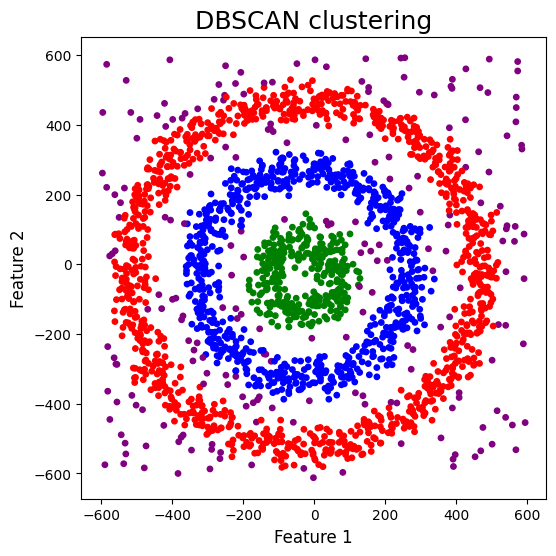

In [54]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 30,min_samples = 6)
dbscan.fit(df[['X','Y']])
df['DBSCAN_opt_labels']= dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()
plt.figure(figsize = (6,6))
plt.scatter(df['X'],df['Y'],c = df['DBSCAN_opt_labels'],cmap = matplotlib.colors.ListedColormap(colors),s = 15)
plt.title('DBSCAN clustering',fontsize = 18)
plt.xlabel('Feature 1',fontsize = 12)
plt.ylabel('Feature 2',fontsize = 12)
plt.show()

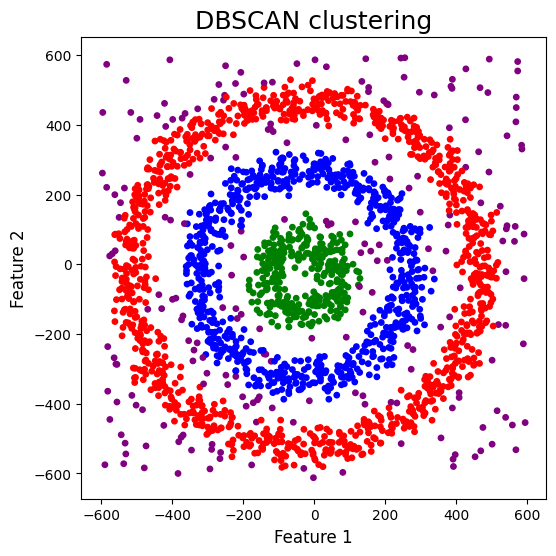

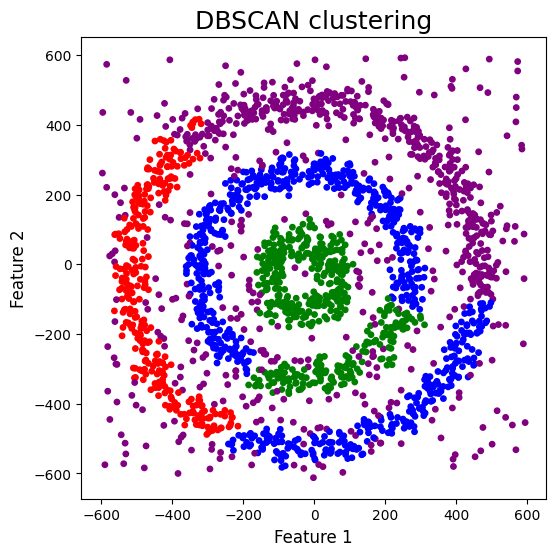

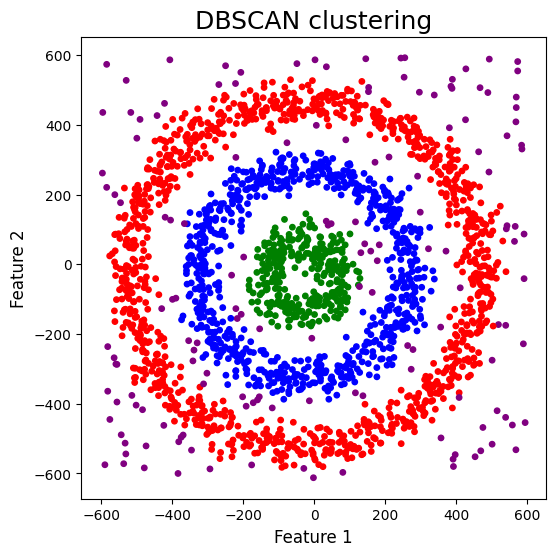

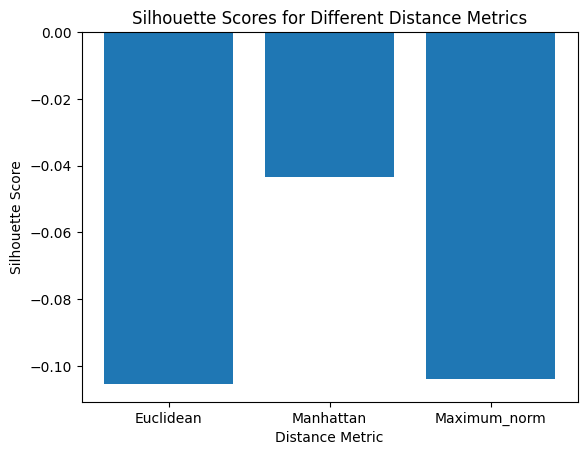

Silhouette Score (Euclidean): -0.11
Silhouette Score (Manhattan): -0.04
Silhouette Score (Maximum_norm): -0.10


In [55]:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def maximum_norm(x, y):
    return np.max(np.abs(x - y))
# Fit DBSCAN using different distance metrics
distance_metrics = {
    'Euclidean': euclidean_distance,
    'Manhattan': manhattan_distance,
    'Maximum_norm': maximum_norm
}

silhouette_scores = {}

for metric_name, metric_func in distance_metrics.items():
    dbscan = DBSCAN(eps=30, min_samples=6, metric=metric_func)
    dbscan.fit(df[['X', 'Y']])
    df['DBSCAN_opt_labels']= dbscan.labels_
    silhouette_scores[metric_name] = silhouette_score(df[['X', 'Y']], dbscan.labels_)
    plt.figure(figsize = (6,6))
    plt.scatter(df['X'],df['Y'],c = df['DBSCAN_opt_labels'],cmap = matplotlib.colors.ListedColormap(colors),s = 15)
    plt.title('DBSCAN clustering',fontsize = 18)
    plt.xlabel('Feature 1',fontsize = 12)
    plt.ylabel('Feature 2',fontsize = 12)
    plt.show()

# Plot silhouette scores as a histogram
plt.bar(range(len(silhouette_scores)), list(silhouette_scores.values()), align='center')
plt.xticks(range(len(silhouette_scores)), list(silhouette_scores.keys()))
plt.xlabel('Distance Metric')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Distance Metrics')
plt.show()
for metric_name, silhouette_score_value in silhouette_scores.items():
    print(f"Silhouette Score ({metric_name}): {silhouette_score_value:.2f}")

In [56]:
# Custom distance metrics
def mahalanobis_distance(x, y, reg_lambda=1e-6):
    cov = np.cov(np.vstack((x, y)).T)
    cov_reg = cov + reg_lambda * np.eye(cov.shape[0])  # Add regularization term
    cov_inv = np.linalg.inv(cov_reg)
    diff = x - y
    return np.sqrt(np.dot(np.dot(diff, cov_inv), diff))

def inner_product_space(x, y):
    return np.dot(x, y)

def hamming_distance(x, y):
    return np.sum(x != y) / len(x)

# Fit DBSCAN using different distance metrics
distance_metrics = {
    'Mahalanobis': mahalanobis_distance,
    'Inner_product_space': inner_product_space,
    'Hamming': hamming_distance
}

silhouette_scores = {}

for metric_name, metric_func in distance_metrics.items():
    dbscan = DBSCAN(eps=30, min_samples=6, metric=metric_func)
    dbscan.fit(df[['X', 'Y']])
    # Check if more than one cluster label is present
    unique_labels = np.unique(dbscan.labels_)
    if len(unique_labels) > 1:
        silhouette_scores[metric_name] = silhouette_score(df[['X', 'Y']], dbscan.labels_)
    else:
        print(f"No meaningful clusters found with {metric_name} metric.")
        silhouette_scores[metric_name] = None  # Set silhouette score to None if no meaningful clusters



No meaningful clusters found with Mahalanobis metric.
No meaningful clusters found with Inner_product_space metric.
No meaningful clusters found with Hamming metric.


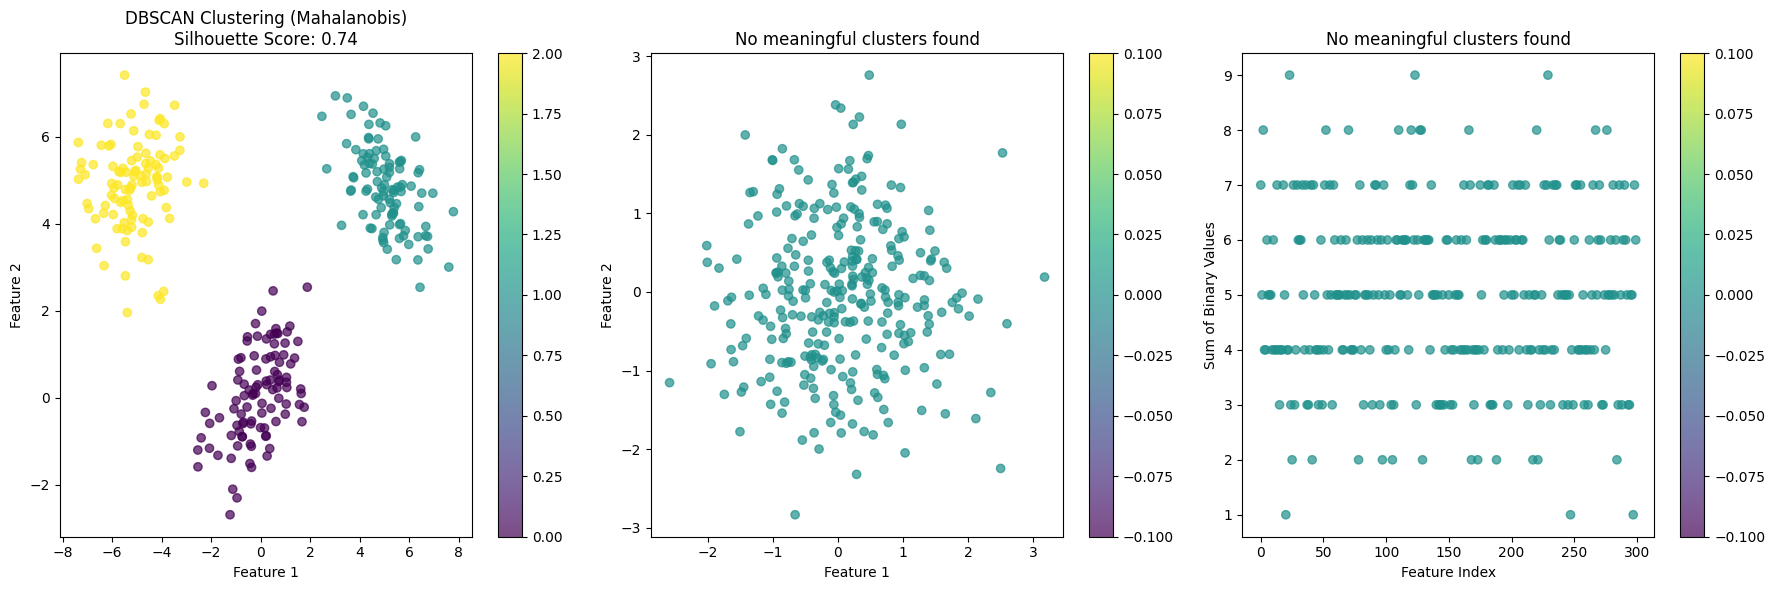

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate sample data for Mahalanobis distance
np.random.seed(0)
X_mahalanobis = np.vstack([
    np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=100),
    np.random.multivariate_normal(mean=[5, 5], cov=[[1, -0.5], [-0.5, 1]], size=100),
    np.random.multivariate_normal(mean=[-5, 5], cov=[[1, 0], [0, 1]], size=100)
])

# Generate sample data for Inner Product Space
X_inner_product = np.random.randn(300, 2)  # Random data points

# Generate sample data for Hamming distance
X_hamming = np.random.randint(0, 2, size=(300, 10))  # Random binary data points

# Perform DBSCAN clustering for Mahalanobis distance
covariance_matrix = np.cov(X_mahalanobis, rowvar=False)
dbscan_mahalanobis = DBSCAN(metric='mahalanobis', metric_params={'V': covariance_matrix}).fit(X_mahalanobis)
if len(np.unique(dbscan_mahalanobis.labels_)) > 1:  # Check if clusters were found
    silhouette_score_mahalanobis = silhouette_score(X_mahalanobis, dbscan_mahalanobis.labels_)
else:
    silhouette_score_mahalanobis = None

# Perform DBSCAN clustering for Inner Product Space
dbscan_inner_product = DBSCAN(metric='cosine').fit(X_inner_product)
if len(np.unique(dbscan_inner_product.labels_)) > 1:  # Check if clusters were found
    silhouette_score_inner_product = silhouette_score(X_inner_product, dbscan_inner_product.labels_)
else:
    silhouette_score_inner_product = None

# Perform DBSCAN clustering for Hamming distance
dbscan_hamming = DBSCAN(metric='hamming').fit(X_hamming)
if len(np.unique(dbscan_hamming.labels_)) > 1:  # Check if clusters were found
    silhouette_score_hamming = silhouette_score(X_hamming, dbscan_hamming.labels_)
else:
    silhouette_score_hamming = None

# Visualize clusters
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.scatter(X_mahalanobis[:, 0], X_mahalanobis[:, 1], c=dbscan_mahalanobis.labels_, cmap='viridis', alpha=0.7)
plt.title(f'DBSCAN Clustering (Mahalanobis)\nSilhouette Score: {silhouette_score_mahalanobis:.2f}' if silhouette_score_mahalanobis is not None else 'No meaningful clusters found')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(132)
plt.scatter(X_inner_product[:, 0], X_inner_product[:, 1], c=dbscan_inner_product.labels_, cmap='viridis', alpha=0.7)
plt.title(f'DBSCAN Clustering (Inner Product Space)\nSilhouette Score: {silhouette_score_inner_product:.2f}' if silhouette_score_inner_product is not None else 'No meaningful clusters found')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(133)
# Repeat the sum of binary values for each x-coordinate
y_hamming = np.sum(X_hamming, axis=1)  # Sum along rows instead of columns
plt.scatter(np.arange(X_hamming.shape[0]), y_hamming, c=dbscan_hamming.labels_, cmap='viridis', alpha=0.7)
plt.title(f'DBSCAN Clustering (Hamming)\nSilhouette Score: {silhouette_score_hamming:.2f}' if silhouette_score_hamming is not None else 'No meaningful clusters found')
plt.xlabel('Feature Index')
plt.ylabel('Sum of Binary Values')
plt.colorbar()

plt.tight_layout()
plt.show()


Silhouette Score (euclidean): 0.36
Silhouette Score (manhattan): -0.21
Silhouette Score (chebyshev): 0.51
Silhouette Score (mahalanobis): 0.05
Silhouette Score (hamming): 0.08


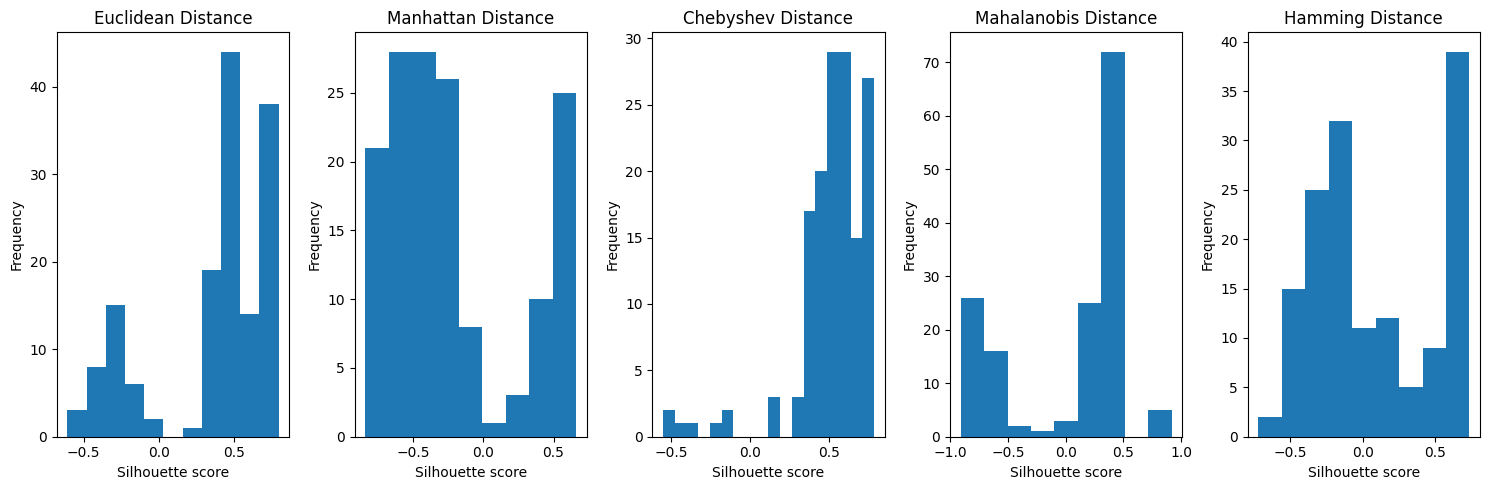

In [60]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'mahalanobis', 'hamming']

# Initialize DBSCAN models with different distance metrics
dbscan_models = {}
for metric in metrics:
    if metric == 'mahalanobis':
        cov_matrix = np.cov(X_scaled, rowvar=False)
        dbscan = DBSCAN(eps=0.5, min_samples=5, metric=metric, metric_params={'V': cov_matrix})
    else:
        dbscan = DBSCAN(eps=0.5, min_samples=5, metric=metric)
    dbscan.fit(X_scaled)
    dbscan_models[metric] = dbscan

# Plot histograms of silhouette scores for each metric
fig, axs = plt.subplots(1, len(metrics), figsize=(15, 5))

for i, metric in enumerate(metrics):
    dbscan = dbscan_models[metric]
    labels = dbscan.labels_

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score ({metric}): {silhouette_avg:.2f}')

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, labels)

    # Create histogram
    axs[i].hist(sample_silhouette_values, bins='auto')
    axs[i].set_title(f'{metric.capitalize()} Distance')
    axs[i].set_xlabel('Silhouette score')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()